# Series de Taylor

## Expansión de funciones en series de Taylor 
La expansión en series de Taylor es una forma alternativa de representar una fución mediante una serie infinita de polinomios alrededor de un punto $a$:

\begin{equation}
f(x) = \sum_{n = 0}^{\infty} \frac{f^{(n)}(a)(x-a)^n}{n!}
\end{equation}

donde $f^{(n)}$ es la $n$-ésima derivada de $f$, con $f^{(0)} = f$

Por ejemplo, derivemos la expansión en series de Taylor de la función $f(x) = 5x^2 + 3x + 5$ alrededor del punto $a = 0$.

Primero, determinamos la forma de cada derivada:

\begin{eqnarray*}
f(x) &=& 5x^2 + 3x + 5\\
f'(x) &=& 10x + 3\\
f''(x) &=& 10 \\
f'''(x) &=& 0 \\
\end{eqnarray*}

Luego, evaluamos cada derivada en el punto $a = 0$, y reemplazamos en la fórmula:

\begin{align*}
f(x) &= \frac{1}{0!}(5a^2 + 3a + 5)(x - a)^0 + \frac{1}{1!}(10a + 3)(x - a)^1 + \frac{1}{2!}(10)(x - a)^2 + 0 + 0 + \cdots\\
     &= \frac{5x^0}{0!} + \frac{3x^1}{1!} + \frac{10x^2}{2!} \\
     &= 5x^2 + 3x + 5
\end{align*}

Si ahora, por ejemplo, derivamos la expansión de Taylor para $a = 2$:

\begin{align*}
f(x) &= \frac{1}{0!}[5(2)^2 + 3(2) + 5](x - 2)^0 + \frac{1}{1!}[10(2) + 3](x - 2)^1 + \frac{1}{2!}(10)(x - 2)^2 + 0 + 0 + \cdots\\
     &= \frac{31(x-2)^0}{0!} + \frac{23(x-2)^1}{1!} + \frac{10(x-2)^2}{2!} = 31 + 23x - 46 + 5x^2 - 20x + 20 \\
     &= 5x^2 + 3x + 5
\end{align*}

Como cololario general tenemos que **una expansión de Taylor de un polinomio siempre es el mismo polinomio**

## Aproximaciones mediante series de Taylor
Para funciones no polinomiales, las series de Taylor continene infinitos términos.

Por ejemplo, la expansión de Taylor de $f(x) = \sin(x)$ alrededor de $a=0$:

\begin{align*}
f(x) &= \frac{\sin(0)}{0!}x^0 + \frac{\cos(0)}{1!}x^1 + \frac{-\sin(0)}{2!}x^2 + \frac{-\cos(0)}{3!}x^3 + \frac{\sin(0)}{4!}x^4 + \frac{\cos(0)}{5!}x^5 + \cdots \\
     &= \frac{1}{1!}x^1 - \frac{1}{3!}x^3 + \frac{1}{5!}x^5 + \cdots \\
\end{align*}

Finalmente, analizando el patrón de la serie, definimos una fórmula general, tal que:

\begin{equation*}
\sin(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!}
\end{equation*}

La expansión de una función en una serie infinita de términos, no pareciera tener un uso práctico. 

La ventaja de esta representación cobra relevancia cuando buscamos evaluar esta función computacionalmente. Esto debido a que al truncar el número de términos podemos, fácilmente, determinar una aproximación de la función.

Mientras más términos incluyamos, mejor la aproximación,

>**Decimos que la aproximación de una función es de orden $N$ cuando la serie considera hasta el término $N$ de la serie de Taylor**

Analicemos esto en un código, a partir de la expansión de la función $f(x) = \sin(x)$

In [19]:
%%capture showplot
import numpy as np
import math    # para generar número factorial
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(x.shape)

plt.figure(figsize = (9, 6))           # Tamaño de figura
plt.rcParams.update({'font.size': 16}) # Tamaño de fuente

for n in range(10):
    y += ((-1)**n*(x)**(2*n+1))/math.factorial((2*n+1))   # serie de taylor
    plt.plot(x,y, label = ('Orden %i' % (2*n+1)))         # graficamos serie de taylor

plt.plot(x, np.sin(x), 'k', label = r'$\sin(x)$')
plt.grid()
plt.title('Aproximación de sin(x) en series de Taylor (a = 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-2,2)
plt.show()

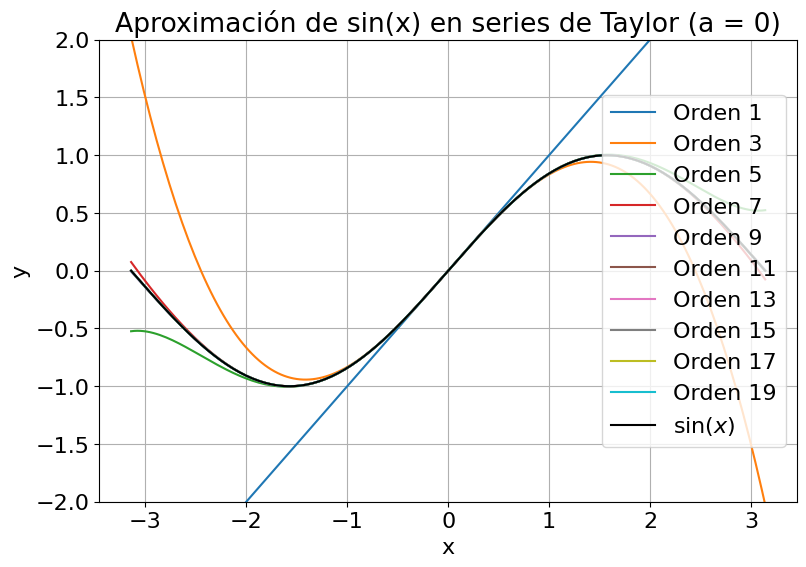

In [20]:
showplot()

A partir del grafico vemos como a medida que aumentamos el orden, la aproximación de la función alrededor del punto $x = 0$ mejora. Para el orden 7, la aproximación es casi perfecta en todo el dominio $x\in [-\pi,\pi]$

Comúnmente, los métodos numéricos utilizan la aproximación de primer orden, también denominada **aproximación lineal**. Esto debido a que la aproximación lineal es suficientemente buena en valores cercanos a $a$.

En otras palabras, siempre se verá lineal si la vemos desde suficientemente cerca.

## Analisis de errores en series de Taylor

### Errores de truncamiento
En la primera clase hablamos de los errores de redondeo inducidos por la capacidad limitada de un computador de almacenar los decimales de un número. Cuando aproximamos una función por una serie de orden $N$, estamos induciendo un error de truncamiento.

Por ejemplo, la expansión de la función $e^x$ en series de Taylor centrada en $x=0$ está dada por:

\begin{equation*}
e^x = 1+x+\frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \dots
\end{equation*}

Analicemos el error de truncamiento para $e^2$, asociado al orden $N$ de la aproximación

In [15]:
exp = 0
x = 2
print('Error de truncamiento |e^2 - f^(n)(2)|')
for i in range(10):
    exp = exp + ((x**i)/math.factorial(i))
    print('Aprox. orden %i = %.5f' % 

          (i,np.abs(exp - np.exp(2))))

Error de truncamiento |e^2 - f^(n)(2)|
Aprox. orden 0 = 6.38906
Aprox. orden 1 = 4.38906
Aprox. orden 2 = 2.38906
Aprox. orden 3 = 1.05572
Aprox. orden 4 = 0.38906
Aprox. orden 5 = 0.12239
Aprox. orden 6 = 0.03350
Aprox. orden 7 = 0.00810
Aprox. orden 8 = 0.00175
Aprox. orden 9 = 0.00034


## Errores de redondeo
Tal como hemos visto en los ejemplos anteriores, la forma más conveniente de computar una serie de Taylor, numéricamente, es mediante la suma susesiva de terminos de la serie.

Esto puede ocacionar errores de redondeo asociado a la acumulación de decimales redondeados en cada suma.

Por ejemplo, cosideremos la aproximación de $e^{-30}$ usando 200 términos de la serie.

In [18]:
exp = 0
x = -30
for i in range(201):
    exp = exp + ((x**i)/math.factorial(i))
print('El valor de e^(-30)')    
print('... Aproximación de orden %i: %.5e' % (i,exp))    
print('... Valor exacto: %.5e' % np.exp(x))

El valor de e^(-30)
... Aproximación de orden 200: -8.55302e-05
... Valor exacto: 9.35762e-14


A partir de este ejemplo podemos ver que, producto del error de redondeo, nuestra estimación de $e^{-30}$ es erronea, a pesar de haber incluído 200 términos de la serie.

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 18: Taylor Series** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html)*, 1st Ed., Academic Press, 2021